# Análise dos dados 

Selecionando os dados que serão úteis.

## Agenda
        Em busca de irregularidades.
        1 - Preço por m²
        2 - Relação Banheiros por Quartos
        3 - Estimando quantidade de banheiro (2º DataFrame)
            3.1 - Preço por m²
            3.2 - Relação Banheiros por Quartos
        4 - Unindo as tabelas
            Salvando Progresso \o\|o|/o/
        5 - Garagem e Bairros 
            (dados extras)
            5.1 Garagem
            5.2 Bairros
        6 - Reanálise da análise .-.
            

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

> Começar pela segunda tabela, pois a outra não contém coluna ['banheiro']. Criaremos tal coluna baseada no padrão quarto/banheiro/m² do dataset que estamos a limpar.

In [30]:
data = pd.read_pickle('2 Apartamentos Dados Limpos.pkl')

data.rename(columns={"X_location": "district", "X_size": "size", "X_bedroom": "bedroom", 
                     "X_bathroom": "bathroom", "X_garage": "garage", "y_price": "price"},
                      inplace = True)
data.head()

,price,district,bedroom,bathroom,size,garage
0,80000,Campo Grande,2,2,67,1
2,130000,Linha do Tiro,2,1,65,1
3,132000,Várzea,2,1,50,1
4,140000,Tejipió,2,1,41,0
5,145000,Várzea,2,1,50,1


## Em busca de irregularidades.

Observando alguns dados estatísticos vemos uma certa normalidade com os valores mínimos e máximos.

    Vamos observar mais de perto.

Antes vamos criar uma coluna para análisar o preço por m².

## 1 - Preço por m²

In [31]:
data['price by m²'] = data['price']/data['size']

In [32]:
data.describe()

,price,bedroom,bathroom,size,garage,price by m²
count,1.164000e+03,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,5.228815e+05,2.795533,2.117698,95.969931,1.505155,5808.520820
std,2.828549e+05,0.868547,1.139789,52.722280,0.633657,1992.358716
min,8.000000e+04,1.000000,1.000000,18.000000,0.000000,1194.029851
25%,3.150000e+05,2.000000,1.000000,59.000000,1.000000,4435.059725
50%,4.200000e+05,3.000000,2.000000,81.000000,1.000000,5729.166667
75%,6.800000e+05,3.000000,3.000000,124.000000,2.000000,6910.541586
max,1.400000e+06,5.000000,6.000000,380.000000,4.000000,14473.684211


Abaixo notamos que o preço dos imóveis com relação ao m² está um tanto quanto disperso. Vemos apartamentos com um valor alto no m² mas o preço bem inferior ao esperado. O mesmo para m² mais baixos com um alto preço de venda.

> Para retirar esses outliers vamos focar nos imóveis com preço por m² entre 3500 e 7000.

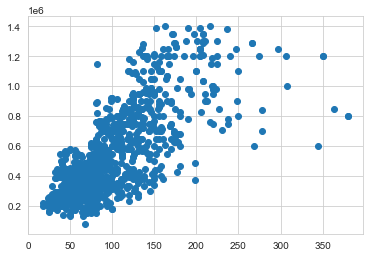

In [33]:
plt.scatter(data['size'], data.price)
plt.show()

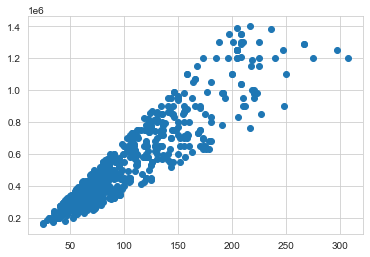

In [35]:
df = data[(data['price by m²'] > 3500) & (data['price by m²'] < 7000) ]
plt.scatter(df['size'], df.price)
plt.show()

> Após essa alteração, a relação entre o número de quartos e o preço também começa a ficar mais aparente... já que, teoricamente, quanto maior a quantidade de quartos, maior o m² e consequentemente, um preço mais elevado.

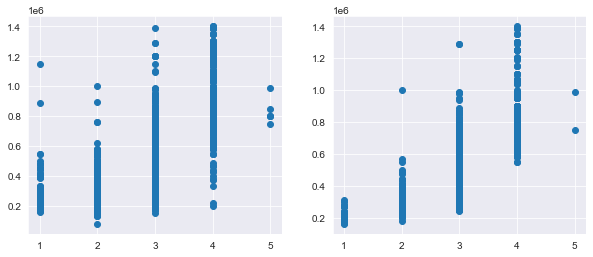

In [36]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(data['bedroom'], data.price)
axes[1].scatter(df['bedroom'], df.price)
plt.show()

## 2 - Relação Banheiros por Quartos

O gráfico demostra observações difíceis de ocorrer. Apartamento com 4 quartos e apenas 1 banheiro, por exemplo. Precisamos fazer essa limpeza para deixar essa relação mais fácil do modelo entender. Mesmo que sejam situações possíveis de acontecer, não são normais e não temos dados o suficiente para o modelo identificá-los corretamente, por assim dizer, eles são ruídos.

    Examinar, editar, examinar, editar.

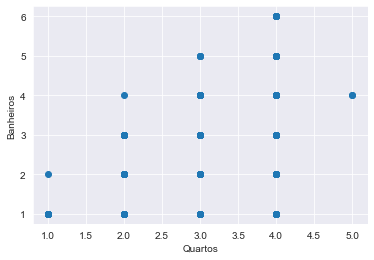

In [38]:
plt.scatter(df.bedroom, df.bathroom)
plt.xlabel('Quartos')
plt.ylabel('Banheiros')
plt.show()

In [39]:
df[(df.bedroom == df.bathroom+3)].head()

,price,district,bedroom,bathroom,size,garage,price by m²
839,580000,Boa Viagem,4,1,122,2,4754.098361
847,580000,Parnamirim,4,1,156,1,3717.948718
882,620000,Tamarineira,4,1,122,2,5081.967213
902,650000,Espinheiro,4,1,170,2,3823.529412
905,650000,Boa Viagem,4,1,120,2,5416.666667


In [40]:
df = df[~(df.bedroom == df.bathroom+3)]

In [41]:
df[(df.bedroom == 3) & (df.bathroom == 1)].head()

,price,district,bedroom,bathroom,size,garage,price by m²
103,243657,Iputinga,3,1,60,1,4060.950000
157,260000,Jardim São Paulo,3,1,72,1,3611.111111
218,280000,Jardim São Paulo,3,1,72,1,3888.888889
219,280000,Iputinga,3,1,78,1,3589.743590
268,296000,Encruzilhada,3,1,60,1,4933.333333


In [42]:
df = df[~((df.bedroom == 3) & (df.bathroom == 1))]

In [43]:
df[((df.bedroom == 2) & (df.bathroom == 4))]

,price,district,bedroom,bathroom,size,garage,price by m²
1136,1000000,Rosarinho,2,4,218,2,4587.155963


In [44]:
df.drop(index=1136, inplace=True)

In [46]:
df[((df.bedroom == 4) & (df.bathroom == 2))].head()

,price,district,bedroom,bathroom,size,garage,price by m²
850,590000,Casa Forte,4,2,136,2,4338.235294
866,600000,Boa Viagem,4,2,120,2,5000.000000
920,660000,Pina,4,2,105,2,6285.714286
932,680000,Tamarineira,4,2,178,2,3820.224719
967,724582,Poço,4,2,134,2,5407.328358


In [47]:
df = df[~((df.bedroom == 4) & (df.bathroom == 2))]

Agora temos um gráfico e dados menos ruidosos.

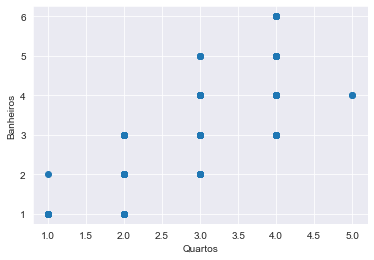

In [48]:
plt.scatter(df.bedroom, df.bathroom)
plt.xlabel('Quartos')
plt.ylabel('Banheiros')
plt.show()

> A relação entre o número de banheiros e o preço também começa a ficar mais aparente...

Perceba o antes e o depois.

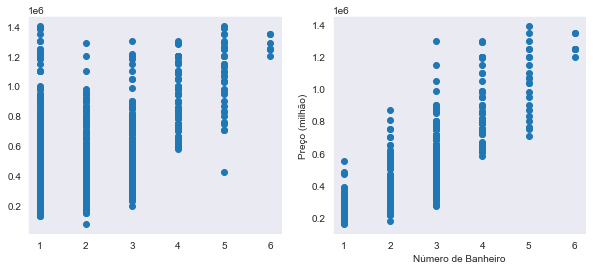

In [52]:
sns.set_style('dark')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(data['bathroom'], data.price)
axes[1].scatter(df['bathroom'], df.price)
plt.xlabel('Número de Banheiro')
plt.ylabel('Preço (milhão)')
plt.show()

## 3 - Estimando quantidade de banheiro (2º DataFrame)

Agora podemos fazer a mesma triagem para a outra tabela.

O primeiro desafio é criar a coluna com número de banheiros. Vamos utilizar as informações da tabela anterior para inserir valores mais confiáveis de acordo com certas características.

In [110]:
data2 = pd.read_pickle('1 Apartamentos Dados Limpos.pkl')

data2.rename(columns={"X_location": "district", "X_size": "size", "X_Bedroom": "bedroom", 
                      "X_garage": "garage", "y_price": "price"}, inplace = True)
data2.head()

,locations,price,district,bedroom,size,garage
0,"Recife, Boa Viagem",750000,Boa Viagem,3,130,1
1,"Jaboatão dos Guararapes, Candeias",200000,Candeias,2,61,1
2,"Recife, Cordeiro",300000,Cordeiro,2,50,1
3,"Paulista, Nossa Senhora do Ó",128000,Nossa Senhora do Ó,2,63,1
4,"Recife, Areias",125000,Areias,2,62,1


Criando a coluna previamente e então editando-a.

> Utilizarei a mediana como referência já que a média é facilmente influenciada por valores mais extremos. Se bem que como os dados já estão limpos elas não se distanciam tanto.

In [111]:
data2['bathroom'] = 0
data2.head(2)

,locations,price,district,bedroom,size,garage,bathroom
0,"Recife, Boa Viagem",750000,Boa Viagem,3,130,1,0
1,"Jaboatão dos Guararapes, Candeias",200000,Candeias,2,61,1,0


In [112]:
df.groupby(['bedroom','bathroom']).mean()['size']

bedroom  bathroom
1        1            38.200000
         2            47.000000
2        1            54.161765
         2            56.941860
         3            77.647059
3        2            80.344828
         3            96.957447
         4           152.000000
         5           163.250000
4        3           158.851852
         4           171.435897
         5           187.777778
         6           209.714286
5        4           145.000000
Name: size, dtype: float64

In [113]:
df.groupby(['bedroom','bathroom']).median()['size']

bedroom  bathroom
1        1            38.0
         2            47.0
2        1            53.0
         2            55.0
         3            76.0
3        2            72.0
         3            89.0
         4           128.0
         5           165.5
4        3           156.0
         4           163.0
         5           202.5
         6           204.0
5        4           145.0
Name: size, dtype: float64

In [114]:
# 1 quarto
data2.loc[(data2.bedroom == 1) & (data2["size"] <= 55), 'bathroom'] = 1
data2.loc[(data2.bedroom == 1) & (data2["size"] > 55), 'bathroom'] = 2

# 2 quartos
data2.loc[(data2.bedroom == 2) & (data2["size"] <= 60), 'bathroom'] = 1
data2.loc[(data2.bedroom == 2) & ((data2["size"] > 60) & (data2["size"] <= 70)), 'bathroom'] = 2
data2.loc[(data2.bedroom == 2) & (data2["size"] > 70)] = 3

# 3 quartos
data2.loc[(data2.bedroom == 3) & (data2["size"] <= 80), 'bathroom'] = 2
data2.loc[(data2.bedroom == 3) & ((data2["size"] > 80) & (data2["size"] <= 120)), 'bathroom'] = 3
data2.loc[(data2.bedroom == 3) & ((data2["size"] > 120) & (data2["size"] <= 170)), 'bathroom'] = 4
data2.loc[(data2.bedroom == 3) & (data2["size"] > 170), 'bathroom'] = 5

# 4 quartos
data2.loc[(data2.bedroom == 4) & (data2["size"] <= 160), 'bathroom'] = 3
data2.loc[(data2.bedroom == 4) & ((data2["size"] > 160) & (data2["size"] <= 175)), 'bathroom'] = 4
data2.loc[(data2.bedroom == 4) & ((data2["size"] > 175) & (data2["size"] <= 205)), 'bathroom'] = 5
data2.loc[(data2.bedroom == 4) & (data2["size"] > 205), 'bathroom'] = 6

# 5 quartos
data2.loc[(data2.bedroom == 5) & (data2["size"] <= 155), 'bathroom'] = 4
data2.loc[(data2.bedroom == 5) & (data2["size"] > 155), 'bathroom'] = 5

data2.head()

,locations,price,district,bedroom,size,garage,bathroom
0,"Recife, Boa Viagem",750000,Boa Viagem,3,130,1,4
1,"Jaboatão dos Guararapes, Candeias",200000,Candeias,2,61,1,2
2,"Recife, Cordeiro",300000,Cordeiro,2,50,1,1
3,"Paulista, Nossa Senhora do Ó",128000,Nossa Senhora do Ó,2,63,1,2
4,"Recife, Areias",125000,Areias,2,62,1,2


### 3.1 - Preço por m²

O mesmo processo que anteriormente. Criar preço por m²... Uau, problemas à vista.

In [115]:
data2['price by m²'] = data2['price']/data2['size']
data2.describe()

,price,bedroom,size,garage,bathroom,price by m²
count,4.455000e+03,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000
mean,4.980954e+05,2.717845,134.397531,1.524130,2.253199,inf
std,5.911441e+05,0.839410,1046.770426,0.787925,1.374310,NaN
min,3.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.860105e+05,2.000000,49.000000,1.000000,1.000000,2556.797235
50%,3.200000e+05,3.000000,64.000000,1.000000,2.000000,4677.350000
75%,6.100025e+05,3.000000,108.000000,2.000000,3.000000,8000.000000
max,7.503010e+06,5.000000,58723.000000,5.000000,6.000000,inf


Deletar todos esses m² igual a 0.

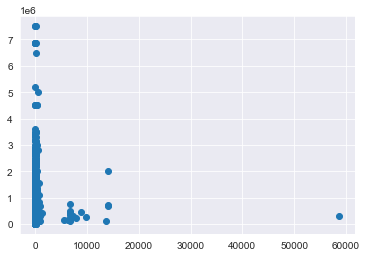

In [116]:
plt.scatter(data2['size'], data2.price)
plt.show()

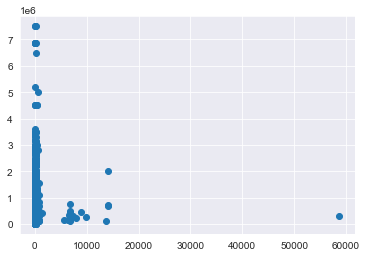

In [117]:
''' Não muita diferença kkkkk por conta do extremos everests '''

data2 = data2[data2['size'] > 25]

plt.scatter(data2['size'], data2.price)
plt.show()

In [118]:
data2[data2['size'] > 2000].head() # hahaha 58723m²

,locations,price,district,bedroom,size,garage,bathroom,price by m²
790,"Recife, Madalena",465000,Madalena,3,8926,2,5,52.095003
850,"Recife, Cordeiro",319000,Cordeiro,4,58723,4,6,5.432284
1173,"Jaboatão dos Guararapes, Piedade",306244,Piedade,3,7372,1,5,41.541508
1339,"Recife, Casa Forte",699934,Casa Forte,4,14000,2,6,49.995286
1373,"Recife, Boa Viagem",750460,Boa Viagem,3,6700,1,5,112.008955


Um pouco melhor, mais ainda ruim. 

> Usaremos o mesmo parâmetro que inicialmente, focaremos nos imóveis com preço por m² entre 3500 e 7000.

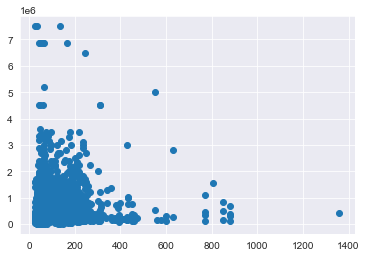

In [119]:
data2 = data2[data2['size'] < 2000]

plt.scatter(data2['size'], data2.price)
plt.show()

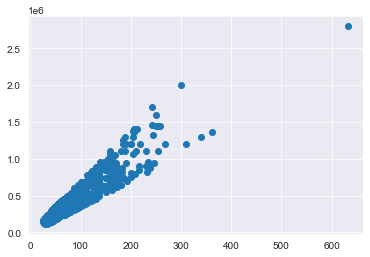

In [120]:
df2 = data2[(data2['price by m²'] > 3500) & (data2['price by m²'] < 7000) ]
plt.scatter(df2['size'], df2.price)
plt.show()

Novamente a relação entre o número de quartos e o preço começa a ficar mais visível.

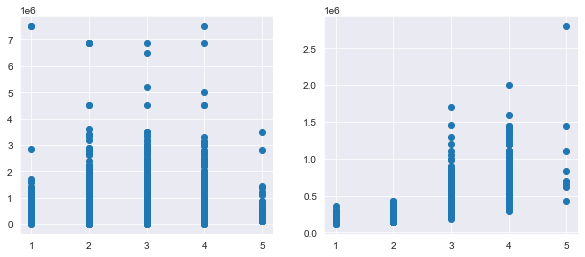

In [121]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(data2['bedroom'], data2.price)
axes[1].scatter(df2['bedroom'], df2.price)
plt.show()

### 3.2 - Relação Banheiros por Quartos

Pensando que juntaremos os datasets, está ok.

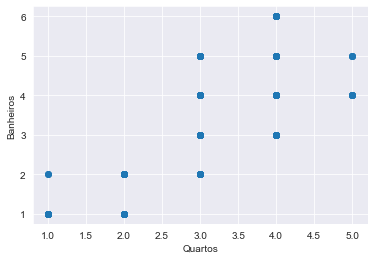

In [122]:
plt.scatter(df2.bedroom, df2.bathroom)
plt.xlabel('Quartos')
plt.ylabel('Banheiros')
plt.show()

Antes e depois da relação entre o número de banheiros e o preço.

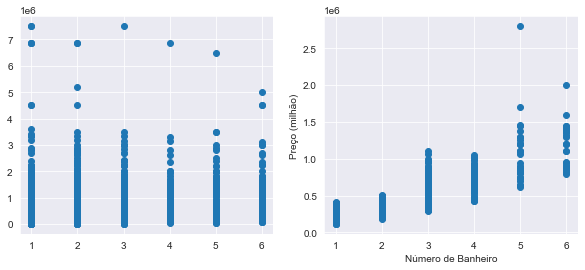

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(data2['bathroom'], data2.price)
axes[1].scatter(df2['bathroom'], df2.price)
plt.xlabel('Número de Banheiro')
plt.ylabel('Preço (milhão)')
plt.show()

## 4 - Unindo as tabelas

Primeiro, manterei as mesmas colunas entre os DFs. E já podemos criar mais um checkpoint de dados.

In [138]:
df.head(1)

,price,district,bedroom,bathroom,size,garage,price by m²
10,160000,Derby,1,1,25,2,6400.0


In [139]:
df2.head(1)

,locations,price,district,bedroom,size,garage,bathroom,price by m²
0,"Recife, Boa Viagem",750000,Boa Viagem,3,130,1,4,5769.230769


In [137]:
df.columns

Index(['price', 'district', 'bedroom', 'bathroom', 'size', 'garage',
       'price by m²'],
      dtype='object')

In [140]:
df3 = df2[['price', 'district', 'bedroom', 'bathroom', 'size', 'garage', 'price by m²']]
df3.head(1)

,price,district,bedroom,bathroom,size,garage,price by m²
0,750000,Boa Viagem,3,4,130,1,5769.230769


In [148]:
data_frame = pd.concat([df, df3]) 

print(f'Tamanho das tabelas:\ndf     {len(df)}')
print(f'df3    {len(df3)}')
print(f'df+df3 {len(df)+len(df3)}')
print(f'\ndata_frame {len(data_frame)}')

Tamanho das tabelas:
df     565
df3    1426
df+df3 1991

data_frame 1991


In [149]:
data_frame.to_pickle('3 Apartamentos pós-análise.pkl')

## 5 - Garagem e Bairros

Ainda falta examinarmos a quantidade de garagem e conferir se há alguma irregularidade com os bairros.

> Mas antes, adicionarei mais dados (da 2ª versão deste mesmo projeto, não quero me alongar em explicações.... basicamente, algo deu errado e decidi recomeçar com sites diferentes). Limpei melhor os dados e de 6000 observações, ficaram 2339, em condições parecidas com os nossos dados atuais.

In [202]:
data_frame.columns

Index(['price', 'district', 'bedroom', 'bathroom', 'size', 'garage',
       'price by m²'],
      dtype='object')

In [203]:
more_data = pd.read_pickle("Dados Extras.pkl")
more_data = more_data[['price', 'district', 'bedroom', 'bathroom', 'size', 'garage','price by m²']]
more_data.shape

(2339, 7)

In [205]:
print(f'Tamanho das tabelas:\ndata_frame     {len(data_frame)}')
print(f'more_data     {len(more_data)}')
print(f'data_frame + more_data {len(data_frame)+len(more_data)}')


data_frame = pd.concat([data_frame, more_data]) 

print(f'\ndata_frame (alterado) {len(data_frame)}')

Tamanho das tabelas:
data_frame     1980
more_data     2339
data_frame + more_data 4319

data_frame (alterado) 4319


In [206]:
data_frame.to_pickle('4 Apartamentos pós-análise.pkl')

In [81]:
data_frame = pd.read_pickle('4 Apartamentos pós-análise.pkl')
data_frame.head()

,price,district,bedroom,bathroom,size,garage,price by m²
10,160000,Derby,1,1,25.0,2,6400.000000
13,168000,Soledade,1,1,25.0,1,6720.000000
19,174000,Parnamirim,1,1,34.0,1,5117.647059
23,180000,Água Fria,2,2,45.0,1,4000.000000
24,180000,Rosarinho,1,1,34.0,1,5294.117647


###  5.1 Garagem

A quantidade de garagem com relação aos quartos parece estar normal. Nesses (kkkk e em vários outros) momentos seria ideal interagir com algum especialista da área. Principalmente por o fator m² ser o provável grande influenciador, mas como vemos no 2º plot, ele parece não afetar tanto a quantia de vagas na garagem.

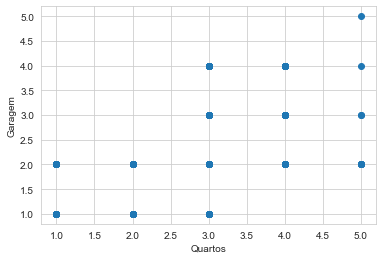

In [3]:
plt.scatter(data_frame.bedroom, data_frame.garage)
plt.xlabel('Quartos')
plt.ylabel('Garagem')
plt.show()

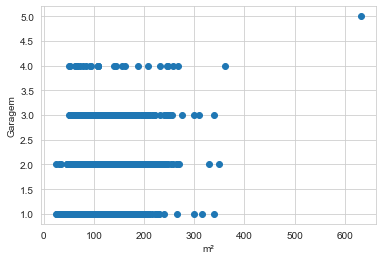

In [13]:
plt.scatter(data_frame['size'], data_frame.garage)
plt.xlabel('m²')
plt.ylabel('Garagem')
plt.show()

### 5.2 Bairros

In [17]:
data_frame.head()

,price,district,bedroom,bathroom,size,garage,price by m²
10,160000,Derby,1,1,25.0,2,6400.000000
13,168000,Soledade,1,1,25.0,1,6720.000000
19,174000,Parnamirim,1,1,34.0,1,5117.647059
23,180000,Água Fria,2,2,45.0,1,4000.000000
24,180000,Rosarinho,1,1,34.0,1,5294.117647


In [35]:
len(data_frame.district.unique())

107

In [82]:
# Eliminando possíveis '\n' ou espaços " " extras
data_frame['district'] = data_frame.district.apply(lambda x: x.strip())

_"Não acho que essa seja a maneira mais sênior de se fazer as coisas, mas basicamente **peguei uma lista com todos os bairros da cidade do Recife (fiz uma limpeza para retirar os '\n's) e comparei os valores em data_frame['district'] com os nomes dos bairros do Recife.**"_

> Assim temos um (talvez não o melhor) modo de saber quais bairros realmente são bairros.

In [83]:
neighborhoods ='''Aflitos,Afogados,Água Fria,Alto José Bonifácio,Alto José do Pinho,Alto do Mandu,Alto do Pascoal,
            Alto Santa Teresinha,Apipucos,Areias,Arruda,Barro,Beberibe,Benfica,Boa Viagem,Boa Vista,Bomba do Hemetério,Bongi,
            Brasília Teimosa,Brejo do Beberibe,Brejo da Guabiraba,Cabanga,Caçote,Cajueiro,Campina do Barreto,Campo Grande,
            Casa Amarela,Casa Forte,Caxangá,Cidade Universitária,Coelhos,Cohab,Comunidade do Pilar,Coque,Coqueiral,Cordeiro,
            Córrego do Jenipapo,Curado,Derby,Dois Irmãos,Dois Unidos,Encruzilhada,Engenho do Meio,Entra Apulso,Espinheiro,
            Estância,Fundão,Graças,Guabiraba,Hipódromo,Ibura,Ilha Joana Bezerra,Ilha do Leite,Ilha do Retiro,Imbiribeira,
            Ipsep,Iputinga,Jaqueira,Jardim São Paulo,Jiquiá,Jordão,Linha do Tiro,Macaxeira,Madalena,Mangabeira,Mangueira,
            Monteiro,Morro da Conceição,Mustardinha,Nova Descoberta,Paissandu,Parnamirim,Passarinho,Pau Ferro,Peixinhos,Pina,
            Poço da Panela,Ponte d’Uchoa,Ponto de Parada,Porto da Madeira,Prado,Recife (bairro),Rosarinho,San Martin,Sancho,
            Santana,Santo Amaro,Santo Antônio,São José,Setúbal,Sítio dos Pintos,Soledade,Tamarineira,Tejipió,Torre,Torreão,
            Torrões,Totó,Várzea,Vasco da Gama,Vila Tamandaré,Zumbi'''

neighborhoods_list = neighborhoods.split(',')

recife_neighborhoods = []
for neighborhood in neighborhoods_list:
    recife_neighborhoods.append(neighborhood.strip()) # removendo '\n' 

# Lista com '\n's 
neighborhoods_list[-6]

'\n            Torrões'

In [84]:
# A que usaremos
recife_neighborhoods[-6]

'Torrões'

Agora podemos comparar...

**Temos 107 bairros diferentes na nossa tabela.
Mas apenas 55 aparecem na lista de bairros do Recife.**

Uma das causas pode ser palavras escritas diferentemente, seja 
"água" != "agua"   ou   "água" != "h2o"

[Regex](https://www.w3schools.com/python/python_regex.asp) poderia ser útil aqui.

### ...

### Insights ( * o * )
Em breve análise percebi que alguns bairros dos dados coletados referem-se à região metropolitana do recife (que é formada por várias cidades conectadas). Ou seja, são dados de apartamentos não da cidade do Recife mas de cidades próximas _(por isso eles não aparecem na lista de bairros do Recife)_.

    Mirueira --> Paulista
    Rio Doce --> Olinda

Outros são derivados da troca na ordem escrita. No Data Cleaning, como pegamos a última parte das strings (na coluna com as localizações) pode ter acontecido de alguns endereços terem o nome do bairro no meio da string e não no final.

    Boa Viagem, Recife --->  Recife
    Piedade, Olinda    --->  Olinda 
    
Primeiro, examinaremos a quantidade de elementos por bairro e eliminaremos os que que contém pouquissímos dados.

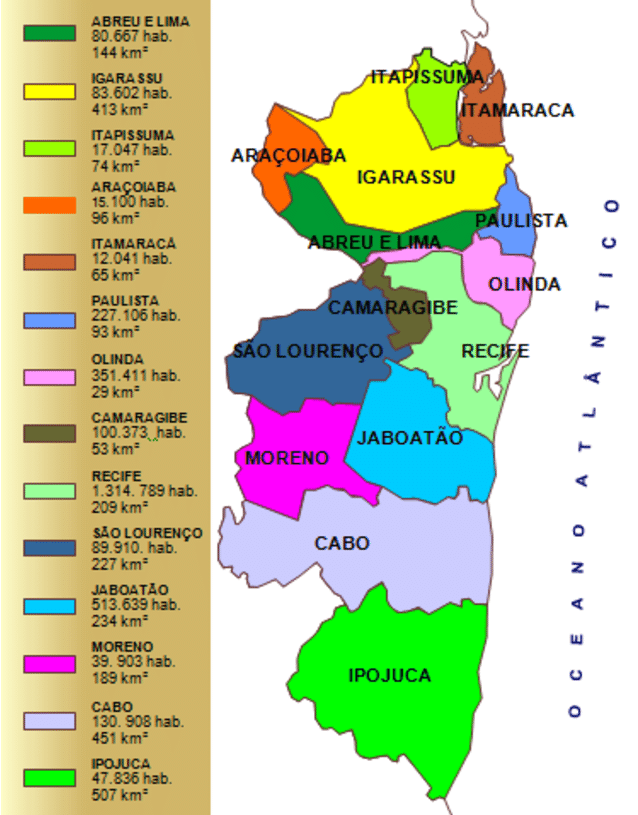

In [34]:
from IPython.display import display, Image
display(Image(filename='Regiao-Metropolitana-de-Recife.png'))

In [85]:
count_equals = 0; not_equals = 0

for neighborhood in data_frame['district'].unique():
    if neighborhood in recife_neighborhoods:
        print(neighborhood)
        count_equals += 1
    else:
        print('____FORA DA LISTA --->',neighborhood)
        not_equals += 1

print('\nConfirmados: ',count_equals)
print('Fora da lista: ',not_equals)

Derby
Soledade
Parnamirim
Água Fria
Rosarinho
Tamarineira
Boa Viagem
Iputinga
Boa Vista
Campo Grande
Graças
Várzea
Torre
Imbiribeira
Casa Amarela
Arruda
Madalena
Aflitos
Cordeiro
Jardim São Paulo
Espinheiro
Caxangá
Encruzilhada
Apipucos
Santo Amaro
Prado
Tejipió
Casa Forte
Torreão
Pina
Ilha do Retiro
____FORA DA LISTA ---> Poço
Poço da Panela
____FORA DA LISTA ---> Brejo de Beberibe
Jaqueira
Monteiro
Setúbal
Ipsep
____FORA DA LISTA ---> Barra de Jangada
____FORA DA LISTA ---> Piedade
Barro
____FORA DA LISTA ---> Ipojuca
____FORA DA LISTA ---> Indianópolis
____FORA DA LISTA ---> Candeias
____FORA DA LISTA ---> Vila Rural
Dois Irmãos
____FORA DA LISTA ---> Centro
____FORA DA LISTA ---> Recife
____FORA DA LISTA ---> Alberto Maia
____FORA DA LISTA ---> Casa Caiada
____FORA DA LISTA ---> Maranguape I
Cajueiro
____FORA DA LISTA ---> Socorro
____FORA DA LISTA ---> Jardim Atlântico
____FORA DA LISTA ---> Sucupira
____FORA DA LISTA ---> Paudalho
____FORA DA LISTA ---> Jaboatão dos Guararapes
__

Deletar bairros com menos de 25 apartamentos.

In [46]:
data_frame.groupby('district').count().sort_values(['bedroom'], ascending=False).head(60)

,price,bedroom,bathroom,size,garage,price by m²
district,,,,,,
Boa Viagem,869,869,869,869,869,869
Casa Amarela,314,314,314,314,314,314
Torre,267,267,267,267,267,267
Madalena,255,255,255,255,255,255
Encruzilhada,218,218,218,218,218,218
Espinheiro,176,176,176,176,176,176
Rosarinho,168,168,168,168,168,168
Graças,147,147,147,147,147,147
Casa Forte,135,135,135,135,135,135


In [86]:
neighborhoods_to_delete = []
districts = data_frame.groupby('district').count().sort_values(['bedroom'], ascending=False)

for row, col in districts.iterrows():
    if col.price < 25:
        neighborhoods_to_delete.append(row)
        
neighborhoods_to_delete[:6]

['Ipojuca', 'Monteiro', 'Janga', 'Casa Caiada', 'Derby', 'Barro']

In [87]:
data_frame = data_frame[~data_frame['district'].isin(neighborhoods_to_delete)]

In [88]:
data_frame.groupby('district').count().sort_values(['bedroom'], ascending=False)

,price,bedroom,bathroom,size,garage,price by m²
district,,,,,,
Boa Viagem,869,869,869,869,869,869
Casa Amarela,314,314,314,314,314,314
Torre,267,267,267,267,267,267
Madalena,255,255,255,255,255,255
Encruzilhada,218,218,218,218,218,218
Espinheiro,176,176,176,176,176,176
Rosarinho,168,168,168,168,168,168
Graças,147,147,147,147,147,147
Casa Forte,135,135,135,135,135,135


In [89]:
count_equals = 0; not_equals = 0
for neighborhood in data_frame['district'].unique():
    if neighborhood in recife_neighborhoods:
        print(neighborhood)
        count_equals += 1
    else:
        print('____FORA DA LISTA --->',neighborhood)
        not_equals += 1
print('\nConfirmados: ',count_equals)
print('Fora da lista: ',not_equals)

Parnamirim
Rosarinho
Tamarineira
Boa Viagem
Iputinga
Boa Vista
Campo Grande
Graças
Várzea
Torre
Imbiribeira
Casa Amarela
Madalena
Aflitos
Cordeiro
Espinheiro
Caxangá
Encruzilhada
Apipucos
Santo Amaro
Prado
Casa Forte
Pina
Ilha do Retiro
____FORA DA LISTA ---> Barra de Jangada
____FORA DA LISTA ---> Piedade
____FORA DA LISTA ---> Candeias
____FORA DA LISTA ---> Centro
____FORA DA LISTA ---> Recife

Confirmados:  24
Fora da lista:  5


Dos fora da lista, eliminarei apenas Recife.

In [91]:
data_frame = data_frame[data_frame['district'] != 'Recife']

## 6 - Reanálise da análise .-.

Podemos examinar novamente a tabela já limpa (só pra confirmar), antes de partirmos para a modelagem. 

> Ainda há outliers. Entretanto, utilizarei esse DataFrame para ver como o modelo se comporta e caso necessário, voltarei e aplicarei mais mudanças.

In [ ]:
data_frame.to_pickle("5 Apartamentos para modelagem.pkl")

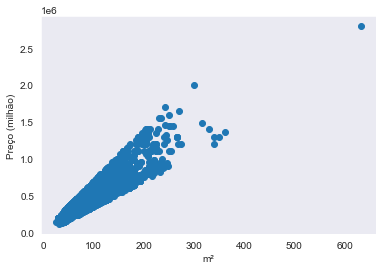

In [110]:
sns.set_style('dark')
plt.scatter(data_frame['size'], data_frame.price)
plt.xlabel('m²')
plt.ylabel('Preço (milhão)')
plt.show()

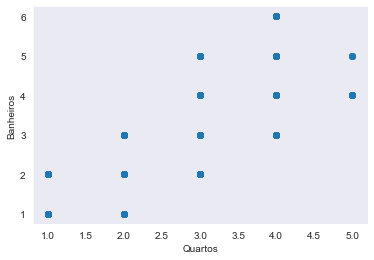

In [103]:
plt.scatter(data_frame.bedroom, data_frame.bathroom)
plt.xlabel('Quartos')
plt.ylabel('Banheiros')
plt.show()

Esses 4 gráficos seguintes me incomodam. O preço deveria aumentar quanto maior o número de quartos, banheiros ou garagens disponíveis. Entretanto essa variância se mostra ser bem pequena, quase como se não fizesse diferença. Imagino que haja outros fatores que interfiram, mas mesmo assim...

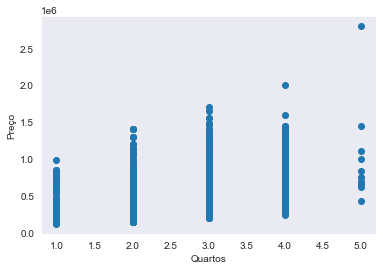

In [111]:
plt.scatter(data_frame.bedroom, data_frame.price)
plt.xlabel('Quartos')
plt.ylabel('Preço')
plt.show()

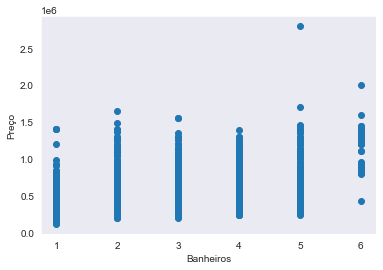

In [113]:
plt.scatter(data_frame.bathroom, data_frame.price)
plt.xlabel('Banheiros')
plt.ylabel('Preço')
plt.show()

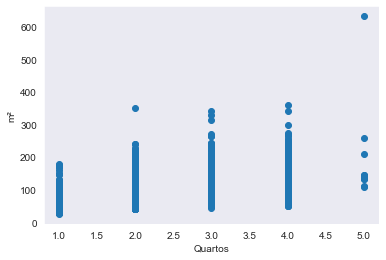

In [125]:
plt.scatter(data_frame.bedroom, data_frame['size'])
plt.xlabel('Quartos')
plt.ylabel('m²')
plt.show()

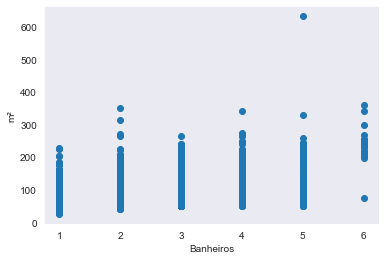

In [124]:
plt.scatter(data_frame.bathroom, data_frame['size'])
plt.xlabel('Banheiros')
plt.ylabel('m²')
plt.show()

Créditos ao meu amigo e mentor [Daniel Bion](https://github.com/danielbion), que disponibilizou parte de seu tempo para me nortear durante a segunda versão do projeto. E acabei reutilizando o código e umas de suas idéias nessa 3ª tentativa também.

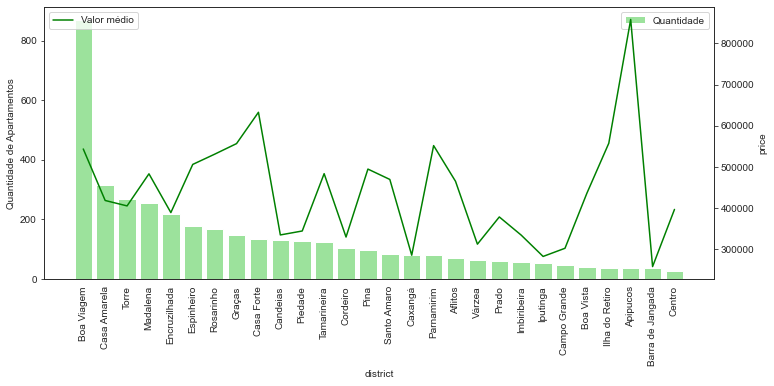

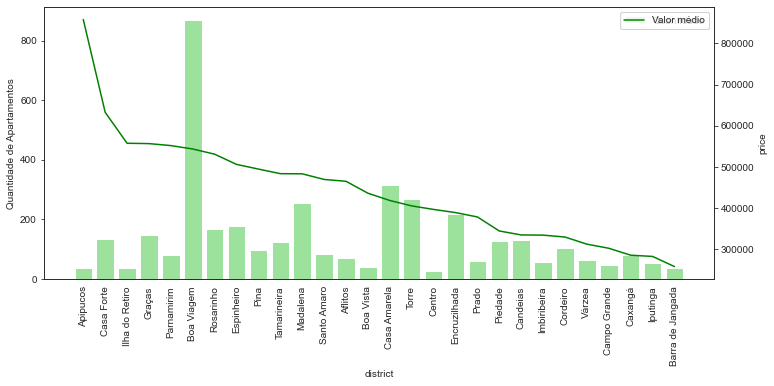

In [127]:
sns.set_style('white')
p = data_frame.groupby('district', as_index = False).agg({'size': 'count', 'price': 'mean'})\
.sort_values('size', ascending = False).reset_index().head(30)

fig = plt.figure(figsize = (12, 5))
ax = sns.barplot(x = 'district', y = 'size', data = p, label = 'Quantidade', color = 'lightgreen')
plt.xticks(rotation = 90)
plt.ylabel('Quantidade de Apartamentos')
plt.legend()
sns.lineplot(x = 'district', y = 'price', data = p, ax = ax.twinx(), label = 'Valor médio', color = 'green', sort = False)

plt.show()

p = data_frame.groupby('district', as_index = False).agg({'size': 'count', 'price': 'mean'})\
.sort_values('price', ascending = False).reset_index().head(30)

fig = plt.figure(figsize = (12, 5))
ax = sns.barplot(x = 'district', y = 'size', data = p, label = 'Quantidade', color = 'lightgreen')
plt.xticks(rotation = 90)
plt.ylabel('Quantidade de Apartamentos')
plt.legend()
sns.lineplot(x = 'district', y = 'price', data = p, ax = ax.twinx(), label = 'Valor médio', color = 'green', sort = False)

plt.show()

Outliers. Pelo que rapidamente examinei, diria que são outliers "seguros". Eles vão interferir no modelo, mas penso que por estarem dentro de certo padrão não serão tão problemáticos assim. Testarei e confirmaremos após a modelagem.

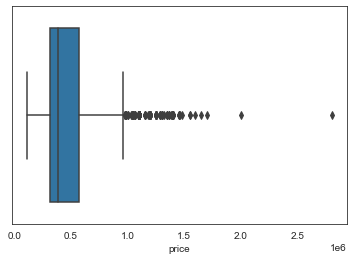

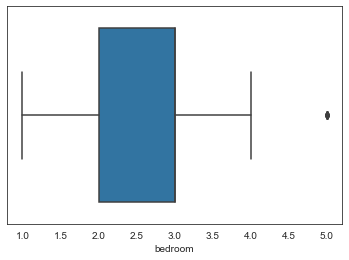

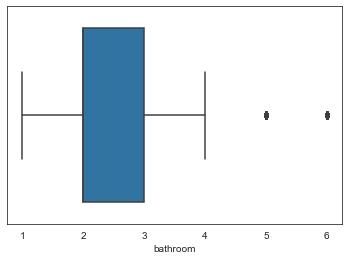

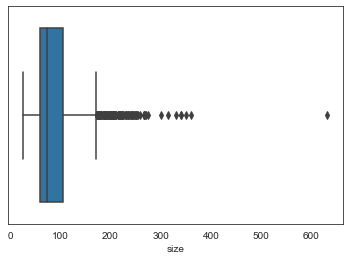

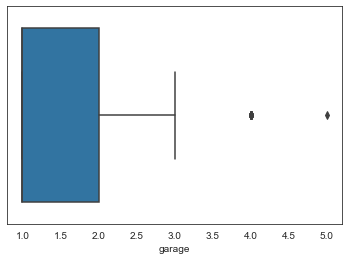

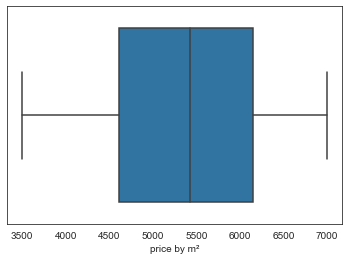

In [128]:
for column in data_frame.columns:
    if(data_frame[column].dtype != 'object'):
        sns.boxplot(data_frame[column])
        plt.show()

GO GO Machine Learning!